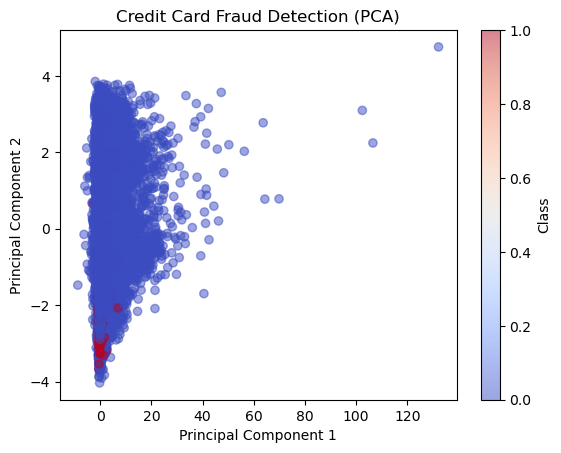

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Preprocessing
# Remove the 'Class' column for clustering as it represents the labels
X = data.drop('Class', axis=1)
y = data['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance (if required)
# Since clustering is an unsupervised task, we don't need to handle class imbalance explicitly

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title('Credit Card Fraud Detection (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()


In [17]:
# Apply clustering algorithms
# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette_score = silhouette_score(X_scaled, kmeans_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Handling outlier labels
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Number of clusters excluding outliers
if n_clusters_dbscan > 1:
    dbscan_labels_adj = dbscan_labels
else:
    # If there's only one cluster (including outliers), treat all points as noise
    dbscan_labels_adj = np.zeros(len(dbscan_labels), dtype=int)

dbscan_silhouette_score = silhouette_score(X_scaled, dbscan_labels_adj)


# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
gmm_silhouette_score = silhouette_score(X_scaled, gmm_labels)

# Compare performance
print("Silhouette Score:")
print("K-means:", kmeans_silhouette_score)
print("DBSCAN:", dbscan_silhouette_score)
print("GMM:", gmm_silhouette_score)

Silhouette Score:
K-means: 0.06714306526188771
DBSCAN: -0.40418561520650004
GMM: 0.07949428790938382


In [18]:
# Assign cluster labels to each data point
kmeans_labels = kmeans.fit_predict(X_scaled)
dbscan_labels = dbscan.fit_predict(X_scaled)
gmm_labels = gmm.fit_predict(X_scaled)

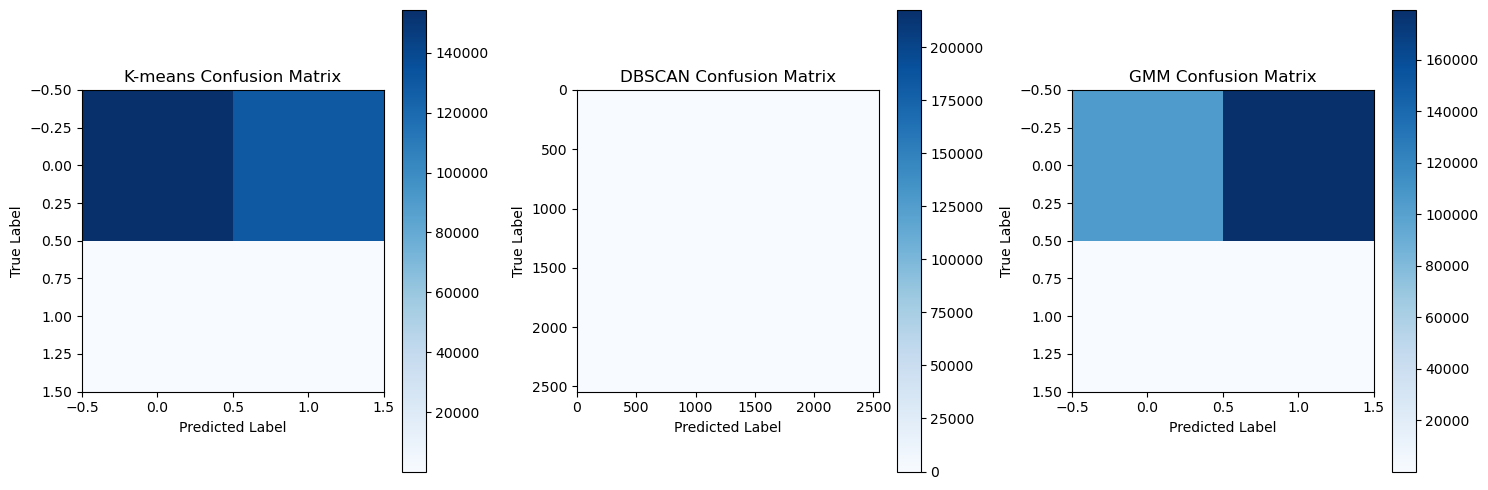

In [19]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices
kmeans_cm = confusion_matrix(y, kmeans_labels)
dbscan_cm = confusion_matrix(y, dbscan_labels_adj)
gmm_cm = confusion_matrix(y, gmm_labels)

# Plot confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(kmeans_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('K-means Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
plt.imshow(dbscan_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('DBSCAN Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 3)
plt.imshow(gmm_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('GMM Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


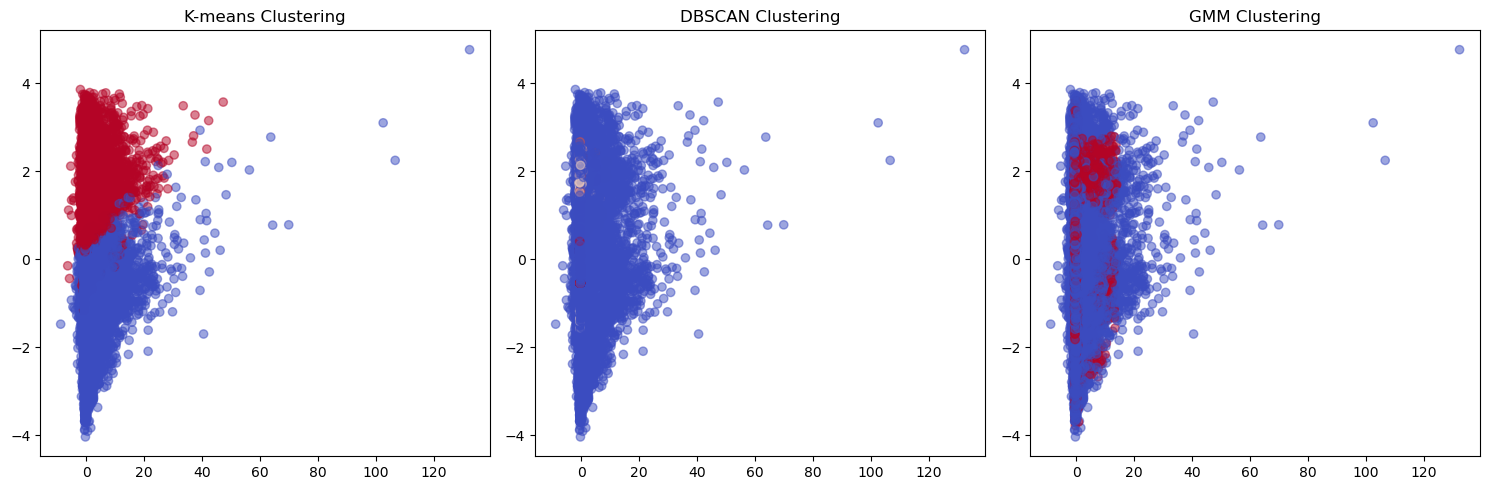

In [20]:
# Visualize cluster assignments
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='coolwarm', alpha=0.5)
plt.title('K-means Clustering')

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels_adj, cmap='coolwarm', alpha=0.5)
plt.title('DBSCAN Clustering')

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='coolwarm', alpha=0.5)
plt.title('GMM Clustering')

plt.tight_layout()
plt.show()
